### Imports

In [1]:
import math
from itertools import product
from functools import partial

import numpy as np
import pandas as p
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import to_rgba

### Utility functions 

In [2]:
def plot_points(points, addnotations = [], **kwargs):
    # plot points
    if len(points):
        plt.scatter(*zip(*points), **kwargs)
    
    # plot addnotations
    for p, text in zip(points, addnotations):
        plt.annotate(text, p, (5, 5), textcoords='offset pixels')

def plot_segments(segments, colors = None, zorder=1, **kwargs):
    # handle colors conversion
    if isinstance(colors, list):
        colors = [to_rgba(c) for c in colors]
    elif colors is not None:
        colors = [to_rgba(colors)] * len(segments)
    
    # plot segments using collection for better performance
    plt.gca().add_collection(LineCollection(segments, colors=colors, zorder=zorder, **kwargs))

def plot_chain(points, closed=False, **kwargs):
    # create segments
    segments = [
        (points[i-1], points[i])
        for i in range(1, len(points))
    ]
    
    # close loop if requested
    if closed:
        segments.append((points[-1], points[0]))
    
    plot_segments(segments, **kwargs)

In [3]:
def random_points_plane(n, low, high):
    return np.random.uniform(low=low, high=high, size=(n, 2))

def orient(a, b, c):
    return np.linalg.det(np.vstack((a - c, b - c)))

def angle(a, b):
    d = b - a
    return np.arctan2(d[1], d[0])

### Graham's scan

In [4]:
def convex_hull_graham(points):
    
    # find first point
    i0 = 0
    for i in range(1, points.shape[0]):
        if points[i,1] < points[i0,1] or (points[i,1] == points[i0,1] and points[i,0] < points[i0,0]):
            i0 = i
    p0 = points[i0]
    
    # calcualte angles
    angles = np.apply_along_axis(partial(angle, p0), 1, points)
    
    # sort points by angles
    points = points[angles.argsort()]
    
    # initialize stack
    hull = [*points[:3]]
    
    # main loop
    i = 3
    while i < points.shape[0]:
        if orient(hull[-2], hull[-1], points[i]) > 0:
            hull.append(points[i])
            i += 1
        else:
            hull.pop()
    
    return hull

#### Example

In [5]:
points = random_points_plane(20, -100, 100)

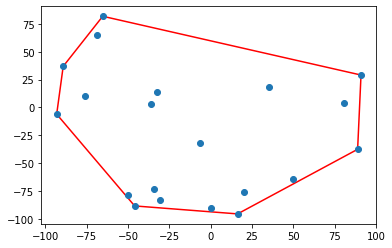

In [6]:
plot_chain(convex_hull_graham(points), closed=True, colors='r')
plot_points(points)